##### 이메일 , 전화번호 등 개인정보 노출 문제로 clear output

# 크롤링 접근
1. Selenium 사용

In [ ]:
#!pip install tqdm
from selenium import webdriver
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import lxml.html
import requests
import time
from bs4 import BeautifulSoup
import re
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains


##### 서울대학교
https://www.snu.ac.kr/academics/undergraduate/colleges

##### BeautifulSoup으로 html소스를 python 객체로 변환하기

In [ ]:
snu_col_dict = {}

chromedriver = 'chromedriver.exe'
driver = webdriver.Chrome(chromedriver)

url = 'https://www.snu.ac.kr/academics/undergraduate/colleges'

driver.get(url);
time.sleep(1) # 

html = driver.page_source                 #driver가 html을 가져오고
soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing

i = 0

while(True):
    try:
        url_ = soup.select('#skip-content > section > div > div > div > div:nth-child(' + str(i+1) + ') > h3 > a')[0].text
        k = soup.select('#skip-content > section > div > div > div > div:nth-child(' + str(i+1) + ') > h3')[0].text
        i += 1
        
        snu_col_dict.update({re.compile('[^가-힣]').sub('', k):url_})
    except:
        break

snu_col_dict

##### 서울대 데이터프레임 생성

In [ ]:
snu_df = pd.DataFrame()

----
# 1. 서울대학교 인문대학 (180명)
https://humanities.snu.ac.kr/faculty

##### 단과대학별 크롤러 생성
- 이름
- 소속
- 전공
- 전화
- 메일



In [ ]:
College = list(snu_col_dict.keys())[0]  #'인문대학'

snu_col_df = pd.DataFrame()

page = 1

while(True):
    
    snu_col_url = 'https://humanities.snu.ac.kr/faculty?page='+str(page)
    driver.get(snu_col_url);
    time.sleep(1)         # 

    print(snu_col_url)#진행상황을 보기위해 출력
    
    html = driver.page_source                 
    soup = BeautifulSoup(html, 'html.parser') 

    page_list = []
    
    selector_ = '#zcmsprogram > div > div > div > div > div > div.col-lg-9 > div.proflist-wrap.mb-3 > div:nth-child('
    
    for i in range(10):
        이름 = soup.select(selector_ + str(i+1) + ') > div.info > h3 > a')[0].text
        학과 = soup.select(selector_ + str(i+1) + ') > div.info > ul > li:nth-child(1) > div > span:nth-child(1)')[0].text[4:]
        전공 = soup.select(selector_ + str(i+1) + ') > div.info > ul > li:nth-child(2) > div')[0].text[6:]
        전화 = soup.select(selector_ + str(i+1) + ') > div.info > ul > li:nth-child(3) > span:nth-child(2)')[0].text[4:]
        메일 = soup.select(selector_ + str(i+1) + ') > div.info > ul > li:nth-child(3) > span:nth-child(3)')[0].text[4:]

        page_list.append([이름, 학과, 전공,전화 , 메일])
        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College

    snu_df = snu_df.append(snu_col_df, ignore_index = True)

    page +=1
    
    if page ==19:
        break
    

#snu_df.columns = ['이름','학과','전공','번호','메일','학교','학부']
snu_df 

# 2. 사회과학대학 (PASS)
social.snu.ac.kr
- PASS .. 한곳에 안모여있고 너무 분산되어있음
- 타이핑이 빠를듯
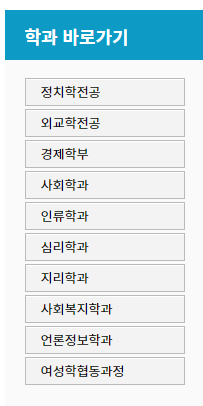
- 직접 모든 과를 들어가서 하나하나 크롤링을 해야하는데 , 너무 오래걸릴 것 같아서 PASS

# 3. 자연과학대학 (230명)
이름
소속
전공
전화
메일

In [ ]:
page = 1

College = list(snu_col_dict.keys())[2]  #'자연과학대학'

while(True):    
    try:
        snu_col_url = 'http://science.snu.ac.kr/kor/academic/professor_list.php?idx=130&m=0&s_key=&s_word=&gubun=0&department=&page=' + str(page) +  '#view_list'

        driver.get(snu_col_url);
        time.sleep(1)         # 
        
        html = driver.page_source                 #driver가 html을 가져오고
        soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
        print(snu_col_url)

        
        page_list = []
        for i in range(10):
            이름 = soup.select('.professor_txt')[i].select('h5')[0].text.strip()[:-3]
            소속 = soup.select('.professor_txt')[i].select('p')[0].text.strip().split()[2]
            전공 = soup.select('.professor_txt')[i].select('p')[0].text.strip().split()[8]
            전화 = soup.select('.professor_txt')[i].select('p')[0].text.strip().split()[14]
            try:
                메일 = soup.select('.professor_txt')[i].select('a')[1]['href'][7:]
            except:
                메일 = soup.select('.professor_txt')[i].select('a')[0]['href'][7:]

            page_list.append([이름, 소속, 전공, 전화 , 메일])
            snu_col_df = pd.DataFrame(page_list)
            snu_col_df['학교'] = '서울대학교'
            snu_col_df['학부'] = College

        snu_df = snu_df.append(snu_col_df, ignore_index = True)

        page +=1
    except:
        break
snu_df

# 4. 간호대학 (22명) + 노가다로 추가 필요


In [ ]:
College = list(snu_col_dict.keys())[3]  #'간호대학'


for page in range(1,4):
    snu_col_url = 'https://nursing.snu.ac.kr/faculty/professor?major=' + str(page)

    driver.get(snu_col_url);
    time.sleep(1)         # 

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []
    

    for i in range(1,10):
        try:
            이름 = soup.select('#zcmsprogram > div.row.clearfix > div:nth-child(' + str(i) +') > div > div.info > h3')[0].text.split()[:-1][0]
            소속 = '간호학'
            전공 = soup.select('#zcmsprogram > div.row.clearfix > div:nth-child(' + str(i) +') > div > div.info > div:nth-child(3)')[0].text

            전화 = '-'
            메일 = soup.select('#zcmsprogram > div.row.clearfix > div:nth-child(' + str(i) +') > div:nth-child(1) > div.info > div:nth-child(4)')[0].text

            page_list.append([이름, 소속, 전공, 전화 , 메일])

            snu_col_df = pd.DataFrame(page_list)
            snu_col_df['학교'] = '서울대학교'
            snu_col_df['학부'] = College
        except:
            pass
 
        

    snu_df = snu_df.append(snu_col_df, ignore_index = True)
snu_df

In [ ]:
soup.select('#zcmsprogram > div.row.clearfix > div:nth-child(1) > div:nth-child(2) > div.info')

# 5. 경영대학 (56명)

cba.snu.ac.kr



In [ ]:
College = list(snu_col_dict.keys())[4]  #경영대학

snu_col_url = 'http://cba.snu.ac.kr/ko/faculty?mode=search&q='

driver.get(snu_col_url);
time.sleep(1)         # 

html = driver.page_source                 #driver가 html을 가져오고
soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
print(snu_col_url)

page_list = []

for i in range(1,57):
    try:
        이름 = re.compile('[^가-힣]').sub('', soup.select('#tabm6_1 > div:nth-child(' + str(i) +') > ul > li:nth-child(1) > a')[0].text)
        소속 = '경영대학'
        전공 = str(soup.select('#tabm6_1 > div:nth-child(' + str(i) + ') > ul >li.info')[0]).split('<br/>')[1][:-5]

        전화 = '-'
        메일 = soup.select('#tabm6_1 > div:nth-child(' + str(i) + ') > ul > li.mail > a')[0].text

        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
    except:
        pass

snu_df = snu_df.append(snu_col_df, ignore_index = True)


snu_df

# 6. 공과대학 (327명)

In [ ]:
list(snu_col_dict.keys())[5]

In [ ]:
#단순 for문으로 돌릴 수 없는 구조라서 위와같이 해결
row1 = '#block-system-main > div > div > div.view-content > ul > li.views-row.views-row-1.views-row-odd.views-row-first > dl > '
row2 = '#block-system-main > div > div > div.view-content > ul > li.views-row.views-row-2.views-row-even > dl > '
row3 = '#block-system-main > div > div > div.view-content > ul > li.views-row.views-row-3.views-row-odd > dl > '
row4 = '#block-system-main > div > div > div.view-content > ul > li.views-row.views-row-4.views-row-even > dl > '
row5 = '#block-system-main > div > div > div.view-content > ul > li.views-row.views-row-5.views-row-odd > dl > '

row_list = [row1, row2, row3, row4, row5]


In [ ]:
College = list(snu_col_dict.keys())[5]  #'공과대학'


for page in range(1,66):
    snu_col_url = 'https://eng.snu.ac.kr/professor?department=All&title=&page=' + str(page)

    driver.get(snu_col_url);
    time.sleep(1)         # 

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    
    for row in row_list:
        try:
            이름 = soup.select(row + 'dt > a')[0].text
            소속 = soup.select(row + 'dd')[0].text.strip().split('\n')[0].split('|')[0][5:]
            전공 = soup.select(row + 'dd')[0].text.strip().split('\n')[1].split('|')[0][6:]
            전화 = '-'
            메일 = soup.select(row + 'dd ')[0].text.strip().split('\n')[2].split('|')[0][6:]
        except:
            pass
        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
        
        if 이름=='황석연':
            break
 
        

    snu_df = snu_df.append(snu_col_df, ignore_index = True)
    
snu_df

##### 이름

# 7. 농업 (101명)

In [ ]:
College = list(snu_col_dict.keys())[6]  #'공과대학'


for page in range(1,12):
    snu_col_url = 'https://cals.snu.ac.kr/about/organization/search/faculty?page=' + str(page)

    driver.get(snu_col_url);
    time.sleep(1)         # 

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    
    for i in range(1, 11):
        try:
            이름 = soup.select('#zcmsprogram > div.proflist-wrap > div:nth-child(' + str(i) + ') > div.info > h3 > a')[0].text
            소속 = soup.select('#zcmsprogram > div.proflist-wrap > div:nth-child(' + str(i) + ') > div.info > ul > li:nth-child(1) > div:nth-child(2)')[0].text.split(' : ')[1].split(' / ')[0]
            전공 = soup.select('#zcmsprogram > div.proflist-wrap > div:nth-child(' + str(i) + ') > div.info > ul > li:nth-child(2)')[0].text.split(' : ')[1].rstrip()
            전화 = '-'
            메일 = soup.select('#zcmsprogram > div.proflist-wrap > div:nth-child(' + str(i) + ') > div.info > ul > li:nth-child(3) > a')[0].text
        except:
            break
        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
    

    snu_df = snu_df.append(snu_col_df, ignore_index = True)
snu_df

# 8. 미술대학 (25명)

In [ ]:
art_col = ['oriental-painting', 'painting', 'sculpture' , 'craft', 'design']
소속list = ['동양화과', '서양화과', '조소과', '공예전공', '디자인전공']
소속list

In [ ]:
'http://art.snu.ac.kr/category/' + art_col[0] + '/?catemenu=Faculty&type=major'

In [ ]:
College = list(snu_col_dict.keys())[7]  #'공과대학'


for col in art_col:
    snu_col_url = 'http://art.snu.ac.kr/category/' + col + '/?catemenu=Faculty&type=major'

    driver.get(snu_col_url);
    time.sleep(1)         # 

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    
    for i, 소속_ in zip(range(2, 12), 소속list):
        try:
            이름 = soup.select('#content > div > div:nth-child(' +  str(i)  + ') > span.title > span:nth-child(2) > a')[0].text.strip()
            소속 = 소속_
            전공 = soup.select('#content > div > div:nth-child(' +  str(i)  + ') > span.title > span.area.hit')[0].text
            전화 = '-'
            메일 = soup.select('#content > div > div:nth-child(' +  str(i)  + ') > span.etc > span:nth-child(1)')[0].text[1:]
        except:
            break
        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College    

    snu_df = snu_df.append(snu_col_df, ignore_index = True)
snu_df

# 9. 사범대학
edu.snu.ac.kr

In [ ]:
College = list(snu_col_dict.keys())[8]  #'사범대'

snu_col_url = 'https://edu.snu.ac.kr/portfolio/type/1'

driver.get(snu_col_url);
time.sleep(1)         # 

for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 1초 대기
    time.sleep(1)


html = driver.page_source                 #driver가 html을 가져오고
soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
print(snu_col_url)

page_list = []      

i = 1

while(True):
    try:
        이름 = re.compile('[^가-힣a-bA-Z. ]').sub('', soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt > a')[0].text)
        소속 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
        전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l3')[0].text.split(' : ')[1]
        전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l6')[0].text.split(' : ')[1]
        메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1]

        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
        print([이름, 소속, 전공, 전화 , 메일])

    except:
        break
        
    i+=1

snu_df = snu_df.append(snu_col_df, ignore_index = True)
    
    
snu_df

# 10. 생활과학대학 (scroll...)
che.snu.ac.kr

명예교수도 너무많이 섞여있고 , 스크롤이고 , 개수도많지않은데 학과별로 세분화시켜놔서 노가다가 빠를듯

##### 이름

# 11. 수의과대학 (44명)
- https://vet.snu.ac.kr/portfolio

In [ ]:
College = list(snu_col_dict.keys())[10]  #'공과대학'

snu_col_url = 'https://vet.snu.ac.kr/portfolio'

driver.get(snu_col_url);
time.sleep(1)         # 



for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 1초 대기
    time.sleep(1)


    
html = driver.page_source                 #driver가 html을 가져오고
soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing 

print(snu_col_url)

page_list = []      



for i in range(1, 45):
    try:
        이름 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt > a')[0].text
        소속 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
        전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l3')[0].text.split(' : ')[1]
        try:
            전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l6')[0].text.split(' : ')[1].strip()
        except:
            전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1].strip()
        메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l4 > a')[0].text
    except:
        print('error')
        break
    page_list.append([이름, 소속, 전공, 전화 , 메일])

    snu_col_df = pd.DataFrame(page_list)
    snu_col_df['학교'] = '서울대학교'
    snu_col_df['학부'] = College

snu_df = snu_df.append(snu_col_df, ignore_index = True)

snu_df

# 12. 약학대학(45명)
- https://snupharm.snu.ac.kr/ko/portfolio/part/4
- https://snupharm.snu.ac.kr/portfolio/part/5

In [ ]:
ph_url_list = ['https://snupharm.snu.ac.kr/ko/portfolio/part/4',  #약학과
               'https://snupharm.snu.ac.kr/portfolio/part/5']     #제약학과

College = list(snu_col_dict.keys())[11]  #'공과대학'

for ph_url in ph_url_list:
    snu_col_url = ph_url

    driver.get(snu_col_url);
    time.sleep(1)         # 

    for i in range(10):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            # 1초 대기
        time.sleep(1)

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    for i in range(1, 45):
        try:
            이름 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt')[0].text
            소속 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
            전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l3')[0].text.split(' : ')[1]
            try:
                전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l7')[0].text.split(' : ')[1].strip()
            except:
                전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l6')[0].text.split(' : ')[1].strip()
            메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1]
        except:
            print('error')
            break
        page_list.append([이름, 소속, 전공, 전화 , 메일])

        print([이름, 소속, 전공, 전화 , 메일])
        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College

    snu_df = snu_df.append(snu_col_df, ignore_index = True)

snu_df

# 13. 음악대학 (35명)

In [ ]:
url_list = ['7', '8' , '13' , '58', '59', '60', '10', '9']

In [ ]:
College = list(snu_col_dict.keys())[12]  #'공과대학'


for url_num in url_list:
    snu_col_url = 'https://music.snu.ac.kr/portfolio/part/' + url_num

    driver.get(snu_col_url);
    time.sleep(1)         # 

    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    for i in range(1, 11):
        try:
            이름 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt > a')[0].text.split('(')[0]
            소속 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
            전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l3')[0].text.split(' : ')[1]
            전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1]
            메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l4 > a')[0].text.strip()
        except:
            break
        page_list.append([이름, 소속, 전공, 전화 , 메일])

        print([이름, 소속, 전공, 전화 , 메일])
        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
        
    

    snu_df = snu_df.append(snu_col_df, ignore_index = True)
snu_df

# 14. 의과대학(Scroll...) # 437명

In [ ]:
page_list = list(range(4,44)) + [88]


College = list(snu_col_dict.keys())[13]  #'의과대학'



for page_ in page_list:
    snu_col_url = 'https://medicine.snu.ac.kr/ko/portfolio/part/' + str(page_)
    
    driver.get(snu_col_url);
    time.sleep(1)         # 

    for i in range(2):  
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            # 1초 대기
        time.sleep(1)



    html = driver.page_source                 #driver가 html을 가져오고
    soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
    print(snu_col_url)

    page_list = []      

    i = 1

    while(True):
        try:
            이름 = re.compile('[^가-힣]').sub('' , soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt > a')[0].text)
            소속 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
            전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l3')[0].text.split(' : ')[1]
            전화 = '-'
            메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1]

            page_list.append([이름, 소속, 전공, 전화 , 메일])

            snu_col_df = pd.DataFrame(page_list)
            snu_col_df['학교'] = '서울대학교'
            snu_col_df['학부'] = College
        except:
            break

        i+=1
        
    snu_df = snu_df.append(snu_col_df, ignore_index = True)
    
    
snu_df

# 15. 자유전공학부(scroll) 21명

In [ ]:
College = list(snu_col_dict.keys())[14]  #'공과대학'


snu_col_url = 'https://cls.snu.ac.kr/portfolio'

driver.get(snu_col_url);
time.sleep(1)         # 

for i in range(5):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 1초 대기
    time.sleep(1)



html = driver.page_source                 #driver가 html을 가져오고
soup = BeautifulSoup(html, 'html.parser') #BeautifulSoup으로 parsing    
print(snu_col_url)

page_list = []      

i = 1

while(True):
    try:
        이름 = re.compile('[^가-힣]').sub('' , soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dt > a')[0].text)
        소속 = '자유전공학 '+soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l1')[0].text.split(' : ')[1]
        전공 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l2')[0].text.split(' : ')[1]
        전화 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l5')[0].text.split(' : ')[1]
        메일 = soup.select('#lc_content > li:nth-child(' + str(i) +') > dl > dd > ul > li.l4')[0].text.split(' : ')[1]

        page_list.append([이름, 소속, 전공, 전화 , 메일])

        snu_col_df = pd.DataFrame(page_list)
        snu_col_df['학교'] = '서울대학교'
        snu_col_df['학부'] = College
    except:
        break

    i+=1

snu_df = snu_df.append(snu_col_df, ignore_index = True)

    
snu_df

In [ ]:
snu_df

In [ ]:
snu_df[~snu_df[4].str.contains('@')]

In [ ]:
snu_df.columns = ['이름','소속','전공','전화번호','이메일','학교','학부']
snu_df

##### + 간호대학 노가다 + 생활과학대학 노가다

In [ ]:
snu_df.to_excel('서울대학교 교수v1.xlsx')